In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Extract

In [2]:
area_raw_df = pd.read_csv('./DATA/FAOSTAT_area.csv')
price_raw_df = pd.read_csv('./DATA/FAOSTAT_prices_apple.csv')
yield_raw_df = pd.read_csv('./DATA/FAOSTAT_yield_per_area.csv') #yield per area
total_yield_raw_df = pd.read_csv('./DATA/FAOSTAT_yield_total.csv')
price_raw_df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1993,1993,7021,Annual value,USD,461.0,NaN,Official data
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1995,1995,7021,Annual value,USD,323.6,NaN,Official data
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1996,1996,7021,Annual value,USD,325.4,NaN,Official data
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1997,1997,7021,Annual value,USD,253.1,NaN,Official data
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1998,1998,7021,Annual value,USD,248.9,NaN,Official data


Transform

In [3]:
area_df = area_raw_df[['Area', 'Year', 'Value']] #(2704, 3)
area_df.columns = area_df.columns.str.replace('Area', 'Country')
area_df.columns = area_df.columns.str.replace('Value', 'Area_ha') #Total area under the crop in the country

price_df = price_raw_df[['Area', 'Year', 'Value']] #(1883, 3)
price_df.columns = price_df.columns.str.replace('Value', 'Price_USD_tonne') #Producer price USD/tonne
price_df.columns = price_df.columns.str.replace('Area', 'Country')
area_df.shape

yield_df = yield_raw_df[['Area', 'Year', 'Value']] #(2679, 3)
yield_df.columns = yield_df.columns.str.replace('Value', 'Yield_hg_ha') #Yield per area hg/ha
yield_df.columns = yield_df.columns.str.replace('Area', 'Country')

total_yield_df = total_yield_raw_df[['Area', 'Year', 'Value']] #(2733, 3)
total_yield_df.columns = total_yield_df.columns.str.replace('Value', 'TotalYield_tonnes') #Total annual yield in tonnes
total_yield_df.columns = total_yield_df.columns.str.replace('Area', 'Country')
total_yield_df.shape

(2733, 3)

Data warehousing

In [4]:
df = area_df.merge(price_df, on=['Country','Year'], how='left')
df = df.merge(yield_df, on=['Country','Year'], how='left')
df = df.merge(total_yield_df, on=['Country','Year'], how='left')
df.head()

,Country,Year,Area_ha,Price_USD_tonne,Yield_hg_ha,TotalYield_tonnes
0,Afghanistan,1991,2346.0,NaN,74625.0,17507.0
1,Afghanistan,1992,2308.0,NaN,74523.0,17200.0
2,Afghanistan,1993,2300.0,NaN,73913.0,17000.0
3,Afghanistan,1994,2350.0,NaN,74468.0,17500.0
4,Afghanistan,1995,2631.0,NaN,74759.0,19669.0


Check if there are NaN vals in the columns and drop for the primer analysis 

In [5]:
#dropping Nanrow values for countries where no price was provided
df.dropna(subset = ['Price_USD_tonne'], inplace=True)
#check = df['TotalYield_tonnes'].isnull().values.any()
print(df)

       Country  Year  Area_ha  Price_USD_tonne  Yield_hg_ha  TotalYield_tonnes
31     Albania  1993   2076.0            461.0      48170.0            10000.0
33     Albania  1995   2140.0            323.6      46729.0            10000.0
34     Albania  1996   2100.0            325.4      47619.0            10000.0
35     Albania  1997   2242.0            253.1      50401.0            11300.0
36     Albania  1998   2300.0            248.9      50000.0            11500.0
...        ...   ...      ...              ...          ...                ...
2671     Yemen  2017   2179.0           2052.2      78068.0            17011.0
2672     Yemen  2018   2148.0           1991.4      77775.0            16706.0
2699  Zimbabwe  2015    744.0           1897.0      89516.0             6660.0
2700  Zimbabwe  2016    735.0           1789.0      89116.0             6550.0
2701  Zimbabwe  2017    734.0           1865.0      88747.0             6514.0

[1854 rows x 6 columns]


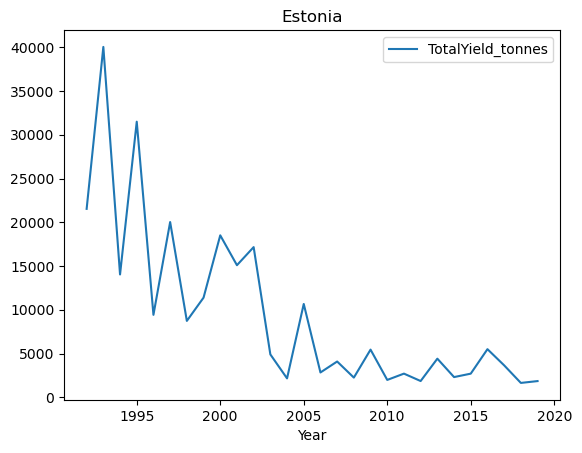

In [6]:
df_Estonia = df.loc[(df['Country'] == "Estonia") & (df['Year'] != 0)]
df_Estonia.plot(x='Year', y='TotalYield_tonnes', kind='line', title = 'Estonia')   #Example visualized for Estonia
plt.show()

In [7]:
#Sorting the data by country per total yield to identify potential grouping producers categories.
df.sort_values(by = 'TotalYield_tonnes', ascending=False, inplace = True)

# separate the data by years 
years = df.Year.unique()
years = sorted(years)
years_df = {}

for year in years:
    df_name = 'df_' + str(year)
    years_df[df_name] = df.loc[df['Year'] == year]
    years_df[df_name].sort_values(by=['TotalYield_tonnes'], ascending=False, inplace = True)
    
print(years_df.keys())

dict_keys(['df_1991', 'df_1992', 'df_1993', 'df_1994', 'df_1995', 'df_1996', 'df_1997', 'df_1998', 'df_1999', 'df_2000', 'df_2001', 'df_2002', 'df_2003', 'df_2004', 'df_2005', 'df_2006', 'df_2007', 'df_2008', 'df_2009', 'df_2010', 'df_2011', 'df_2012', 'df_2013', 'df_2014', 'df_2015', 'df_2016', 'df_2017', 'df_2018', 'df_2019'])


/Users/kath/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
#check how much data is available 

for key in years_df.keys():
    length = len(years_df[key])
    print(key, " length: ", length)

df_1991  length:  35
df_1992  length:  43
df_1993  length:  48
df_1994  length:  50
df_1995  length:  55
df_1996  length:  57
df_1997  length:  61
df_1998  length:  62
df_1999  length:  63
df_2000  length:  69
df_2001  length:  71
df_2002  length:  72
df_2003  length:  70
df_2004  length:  69
df_2005  length:  69
df_2006  length:  71
df_2007  length:  70
df_2008  length:  70
df_2009  length:  70
df_2010  length:  69
df_2011  length:  70
df_2012  length:  69
df_2013  length:  68
df_2014  length:  68
df_2015  length:  70
df_2016  length:  70
df_2017  length:  69
df_2018  length:  66
df_2019  length:  60


In [9]:
by_parts = {}

for key, df in years_df.items():
    print(df.describe())
    df

         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    35.0  3.500000e+01        35.000000      35.000000       3.500000e+01
mean   1991.0  1.312495e+05       625.222857  151472.914286       8.530375e+05
std       0.0  3.848242e+05       517.799738   84070.227351       1.235847e+06
min    1991.0  3.000000e+01        11.300000   27328.000000       4.400000e+02
25%    1991.0  1.012750e+04       276.000000   98928.000000       1.452850e+05
50%    1991.0  2.476500e+04       492.300000  142378.000000       5.150740e+05
75%    1991.0  5.871250e+04       764.350000  190933.000000       8.199975e+05
max    1991.0  1.663890e+06      2691.000000  367793.000000       4.557334e+06
         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    43.0  4.300000e+01        43.000000      43.000000       4.300000e+01
mean   1992.0  1.311835e+05       491.741860  185063.953488       9.892326e+05
std       0.0  4.050872e+05       397.698798  149551

max    2003.0  1.901129e+06      1689.800000  475059.000000       2.110516e+07
         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    69.0  6.900000e+01        69.000000      69.000000       6.900000e+01
mean   2004.0  8.857762e+04       520.765217  155376.869565       1.164120e+06
std       0.0  3.172797e+05       405.459373  133054.175692       4.000016e+06
min    2004.0  8.000000e+00        45.100000    2427.000000       3.200000e+01
25%    2004.0  3.595000e+03       286.700000   54545.000000       3.530700e+04
50%    2004.0  1.338100e+04       409.500000  126148.000000       1.500700e+05
75%    2004.0  4.000000e+04       624.500000  185658.000000       6.908860e+05
max    2004.0  1.877321e+06      2420.700000  649443.000000       2.368197e+07
         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    69.0  6.900000e+01        69.000000      69.000000       6.900000e+01
mean   2005.0  8.864955e+04       520.628986  150362

In [10]:
#devide df by parts for better ploting preformance
by_parts = {}

for key, df in years_df.items():
    df_number_of_parts = math.ceil(len(df) / 20)
    j = 0
    i = 20
    arr = []
    
    for parts in range(df_number_of_parts):
        df_part = df.iloc[j:i]
        arr.append(df_part)
        j += 20
        i += 20
        
    by_parts[key] = arr

print(by_parts['df_1991'][1])
        #plt.bar(df_part["Country"], df_part["TotalYield_tonnes"])

                               Country  Year  Area_ha  Price_USD_tonne  \
1826                          Pakistan  1991  27865.0            994.7   
144                          Australia  1991  20400.0            492.3   
1971                          Portugal  1991  24765.0            639.1   
1711                       Netherlands  1991  16800.0            780.9   
952                             Greece  1991  17070.0            678.8   
2329                       Switzerland  1991   4943.0            684.8   
1913                              Peru  1991  10055.0            336.6   
693                            Denmark  1991   3367.0            831.7   
2415                           Tunisia  1991  10200.0            648.9   
2587                           Uruguay  1991   1894.0            486.4   
722                            Ecuador  1991   3480.0             11.3   
289   Bolivia (Plurinational State of)  1991   1330.0            232.9   
606                             Cyprus

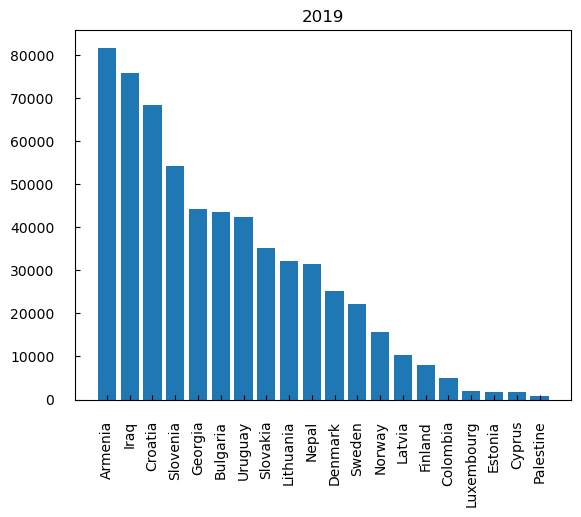

In [11]:
plt.bar(by_parts['df_2019'][2]['Country'], by_parts['df_2019'][2]["TotalYield_tonnes"])
plt.tick_params(axis="both", direction="in", pad=15)
plt.title("2019")
plt.xticks(rotation='vertical')

plt.show()

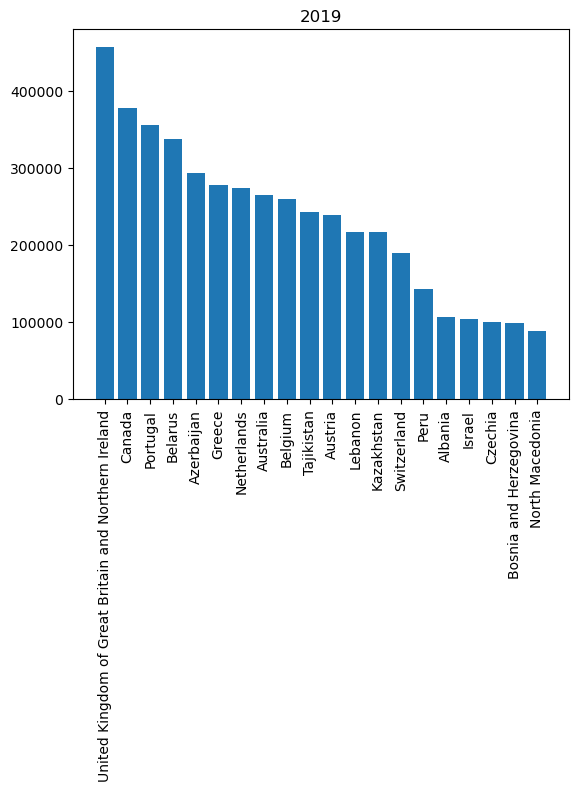

In [13]:
plt.bar(by_parts['df_2019'][1]['Country'], by_parts['df_2019'][1]["TotalYield_tonnes"])
plt.title("2019")
plt.xticks(rotation='vertical')

plt.show()

In [12]:
fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
ax1=plt.subplot(2,2,1)

plt.bar(by_parts['df_1993'][0]['Country'], by_parts['df_1993'][0]["TotalYield_tonnes"])
plt.xticks(rotation='vertical')

plt.bar(by_parts['df_1993'][1]['Country'], by_parts['df_1993'][1]["TotalYield_tonnes"])
plt.tick_params(axis="both", direction="in", pad=15)
plt.xticks(rotation='vertical')

plt.bar(by_parts['df_1993'][2]['Country'], by_parts['df_1993'][2]["TotalYield_tonnes"])
plt.tick_params(axis="both", direction="in", pad=15)
plt.xticks(rotation='vertical')

plt.title("1993")
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 